In [1]:
import sim
import numpy as np
import matplotlib.pyplot as plt

### Set

In [2]:
### Set initialization parameters ###

# Inital populations  are homogenous, i.e. equal in each cell.
A_init = 200  
B_init = 75

In [3]:
### Set the rate parameters  ###

# Birth parameter for species A
mu = 1

# Birth parameter for species B
beta = 3


# Death parameter for species A
alpha = 0.02


# Reaction parameter for "2A + B -> 3A" 
kappa = 1e-6


# Diffusion parameters for species A and B
d_A = 1.6
d_B = 160

# Store all the parameters in a dictionary
params = {'mu': mu, 'beta': beta, 'alpha': alpha, 'kappa': kappa, 
          'd_A': d_A, 'd_B': d_B}

In [4]:
#### Set gridsize parameters ###

m = 50  # number of rows
n = 50 # number of columns

In [12]:
### Set the time interval ###

tau = .001

In [13]:
### Set runtime parameter ###

N_t = 10_000_000  # number of units of time

### Run Movie

In [14]:
X_A, X_B = sim.initialize_movie(N_t, m, n, A_init, B_init)

In [ ]:
%%time 

# Loop through time
for t in np.arange(N_t-1):
    if t % 100_000 == 0:
        print(t)
    sim.calculate_movie(tau, X_A, X_B, t, **params)

0
100000
200000
300000
400000
500000
600000
700000
800000


### Run Picture

In [ ]:
X_A, X_B = sim.initialize_picture(m, n, A_init, B_init)

In [ ]:
%%time 

# Loop through time
for t in np.arange(N_t-1):
    if t % 100_000 == 0:
        print(t)
    X_A, X_B = sim.calculate_picture(tau, X_A, X_B, **params)

In [ ]:
class Simulation:
    def __init__(self, N_t, m, n, A_init, B_init, tau, 
                 mu, beta, alpha, kappa, d_A, d_B, movie=True):
        self.N_t = N_t
        self.m = m
        self.n = n
        self.A_init = A_init
        self.B_init = B_init
        

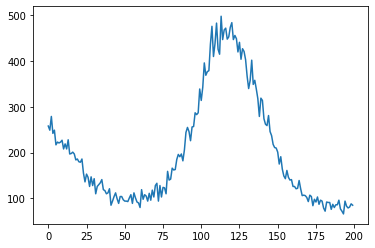

In [15]:
plt.plot(X_A[-1].ravel());

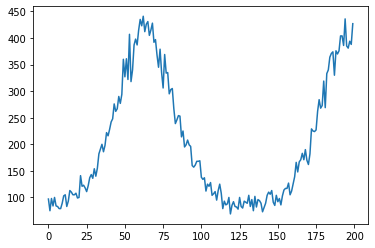

In [40]:
plt.plot(X_A[-1].ravel());

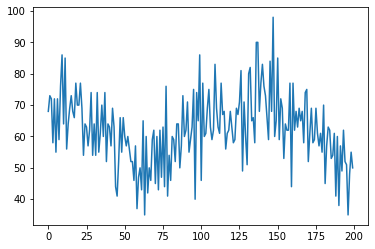

In [41]:
plt.plot(X_B[-1].ravel());